In [16]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Load data
df = pd.read_csv(r"C:\Users\senap\Downloads\datasetsandcodefilesstockmarketprediction\tesla.csv")

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [20]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\senap\AppData\Local\Temp\ipykernel_4044\2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [21]:
print(f'DataFrame contains Stock prices between {df.Date.min()} {df.Date.max()}')
print(f'Total days = {(df.Date.max() - df.Date.min()).days}days')

DataFrame contains Stock prices between 2010-01-07 00:00:00 2019-12-03 00:00:00
Total days = 3617days


In [22]:
df.describe

<bound method NDFrame.describe of            Date        Open        High         Low       Close   Adj Close  \
0    2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1    2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2    2010-01-07   25.000000   25.920000   20.270000   21.959999   21.959999   
3    2010-02-07   23.000000   23.100000   18.709999   19.200001   19.200001   
4    2010-06-07   20.000000   20.000000   15.830000   16.110001   16.110001   
...         ...         ...         ...         ...         ...         ...   
2188 2019-11-03  283.519989  291.279999  280.500000  290.920013  290.920013   
2189 2019-12-03  286.489990  288.070007  281.059998  283.359985  283.359985   
2190 2019-03-13  283.899994  291.989990  282.700012  288.959991  288.959991   
2191 2019-03-14  292.450012  295.390015  288.290009  289.959991  289.959991   
2192 2019-03-15  283.510010  283.723999  274.399994  275.429993  275.429993   

        Volume  


<Axes: >

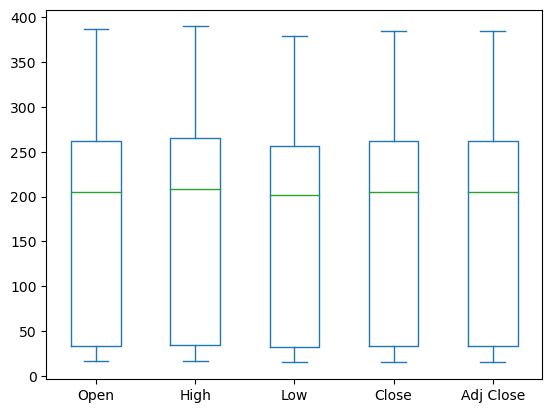

In [23]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind = 'box')

In [24]:
df1 = df.reset_index()['Close']

In [25]:
df1.shape

(2193,)

In [26]:
df1

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2188    290.920013
2189    283.359985
2190    288.959991
2191    289.959991
2192    275.429993
Name: Close, Length: 2193, dtype: float64

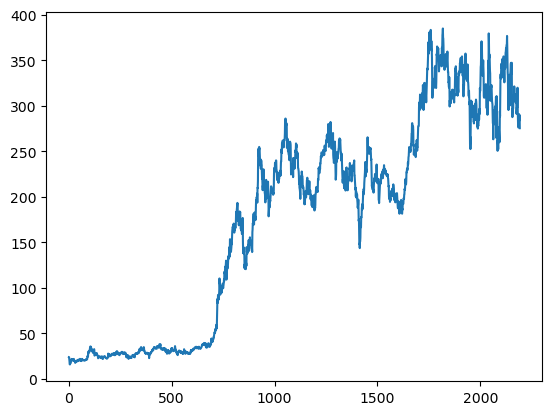

In [12]:
plt.plot(df1)

In [28]:
#LSTM are sensitive to the scale of the data. so we apply minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [29]:
df1

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       ...,
       [0.73986996],
       [0.74257852],
       [0.70322317]])

In [30]:
#Splitting dataset into Train and Test split
train = int(len(df1)*0.65)
test = len(df1) - train
train_data, test_data = df1[0:train,:], df1[train:len(df1),:1]

In [32]:
train,test

(1425, 768)

In [33]:
#Convert an array o values into a dataset matrix
def data(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]          #i=0  0,1,2,....,99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [36]:
#Reshape into  X = t, t+1, t+2, t+3 and Y = t+4
import numpy
time_step = 100
X_train, Y_train = data(train_data, time_step)
X_test, Y_test = data(test_data, time_step)

In [38]:
X_train.shape, Y_train.shape

((1324, 100), (1324,))

In [40]:
#Reshape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [41]:
#Create LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [43]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1))) #o/p of x, y(100,1)
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))  
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100

21/21 [==============================] - 17s 327ms/step - loss: 0.0257 - val_loss: 0.0048
Epoch 2/100
21/21 [==============================] - 4s 199ms/step - loss: 0.0022 - val_loss: 0.0037
Epoch 3/100
21/21 [==============================] - 4s 202ms/step - loss: 0.0014 - val_loss: 0.0076
Epoch 4/100
21/21 [==============================] - 4s 200ms/step - loss: 0.0013 - val_loss: 0.0057
Epoch 5/100
21/21 [==============================] - 4s 201ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 6/100
21/21 [==============================] - 4s 199ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 7/100
21/21 [==============================] - 4s 201ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 8/100
21/21 [==============================] - 4s 200ms/step - loss: 0.0011 - val_loss: 0.0051
Epoch 9/100
21/21 [==============================] - 4s 169ms/step - loss: 0.0010 - val_loss: 0.0057
Epoch 10/100
21/21 [==============================] - 4s 180ms/step - loss: 9.8562e-04 - 

In [46]:
import tensorflow as tf

In [49]:
#Prediction and check performance metrics
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

21/21 [==============================] - 1s 44ms/step


In [50]:
#Transformback to original form
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [51]:
#Calculate RMSE prformance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_pred))

154.64505168885302

In [52]:
#RMSE of test data
math.sqrt(mean_squared_error(Y_test, test_pred))

295.58841250713607

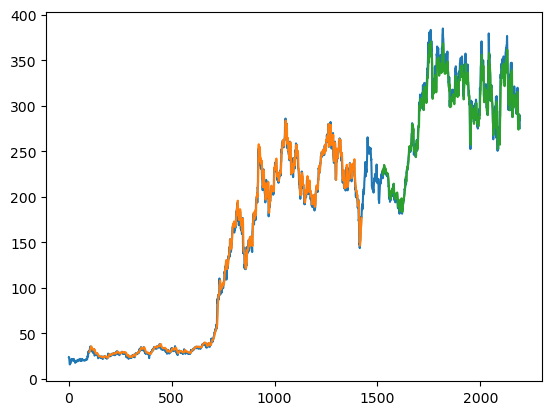

In [54]:
#Plotting
#Shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred
#Shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df1)-1, :] = test_pred
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [55]:
len(test_data)

768

In [56]:
x_input = test_data[668:].reshape(1,-1)
x_input.shape

(1, 100)

In [60]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.661430119176598,
 0.6640032827735645,
 0.7539003656554712,
 0.7386240520043337,
 0.810021627843987,
 0.8534669393282773,
 0.8641657800650054,
 0.8507583802816902,
 0.8708559236186348,
 0.8897074729144094,
 0.8954767172264355,
 0.881906809317443,
 0.8809859100758397,
 0.9002166955579632,
 0.9089923997833153,
 0.9065818255687974,
 0.8544962053087757,
 0.874675002708559,
 0.8889490790899242,
 0.9009750866738895,
 0.9168743174431203,
 0.9145991359696641,
 0.898401923076923,
 0.8732123564463705,
 0.8397345260021669,
 0.8943661971830986,
 0.8887324295774647,
 0.8994311890574215,
 0.8812838921993499,
 0.9065005715059588,
 0.9281960725893824,
 0.931473488624052,
 0.9405742091007584,
 0.9267876516793067,
 0.9462350866738894,
 0.9505959100758397,
 0.9501625297941495,
 0.9777627546045503,
 0.9477518716143012,
 0.9009209452871072,
 0.8700704198266521,
 0.8590736755146263,
 0.8114301327193932,
 0.8233206635969664,
 0.7572860644637053,
 0.8404387757313109,
 0.8134615520043337,
 0.8615113624052004

In [62]:
#Demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100):
        #Print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
        
print(lst_output)

[0.7082855]
101
1 day input [0.66400328 0.75390037 0.73862405 0.81002163 0.85346694 0.86416578
 0.85075838 0.87085592 0.88970747 0.89547672 0.88190681 0.88098591
 0.9002167  0.9089924  0.90658183 0.85449621 0.874675   0.88894908
 0.90097509 0.91687432 0.91459914 0.89840192 0.87321236 0.83973453
 0.8943662  0.88873243 0.89943119 0.88128389 0.90650057 0.92819607
 0.93147349 0.94057421 0.92678765 0.94623509 0.95059591 0.95016253
 0.97776275 0.94775187 0.90092095 0.87007042 0.85907368 0.81143013
 0.82332066 0.75728606 0.84043878 0.81346155 0.86151136 0.85861319
 0.79718309 0.77074752 0.8176869  0.86446368 0.86552006 0.87413326
 0.89157638 0.89777901 0.8629469  0.89011374 0.89450159 0.8979144
 0.77589385 0.76684727 0.73615925 0.74677684 0.76175517 0.75996751
 0.76289272 0.79352651 0.78878654 0.80284396 0.80468585 0.82760023
 0.81641387 0.79011379 0.78548209 0.80455037 0.80176056 0.79190144
 0.77998372 0.79111594 0.78504879 0.77670639 0.74601845 0.75544418
 0.76644092 0.76397612 0.80969661 0

In [63]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [64]:
len(df1)

2193

In [78]:
df2 = df1.tolist()
df2.extend(lst_output)

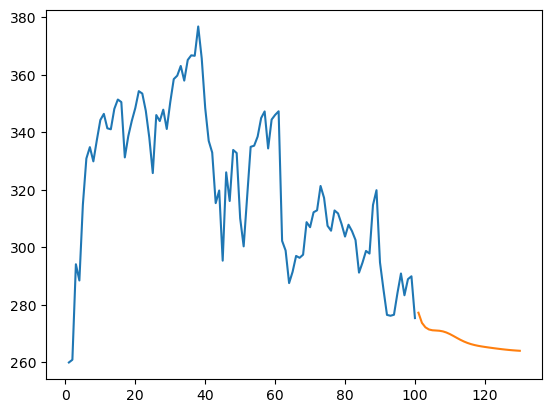

In [79]:
plt.plot(day_new, scaler.inverse_transform(df1[2093:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))